In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Initial Setup ##

In [139]:
xl = pd.ExcelFile("merged1.xlsx")
xl.sheet_names

['Sheet1']

In [140]:
df = xl.parse("Sheet1")
df.head()

,1574553619579,13.355469,-13.603123,-35.13745,0,0.1,0.2,0.3,0.4,0.5,2
0,1574553619630,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702,2
1,1574553619727,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
2,1574553619779,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
3,1574553619824,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886,2
4,1574553619919,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886,2


In [141]:
df.columns = ["timestamp", "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z", "label"]

In [142]:
df.head()

,timestamp,magneto_x,magneto_y,magneto_z,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,label
0,1574553619630,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702,2
1,1574553619727,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
2,1574553619779,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
3,1574553619824,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886,2
4,1574553619919,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886,2


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40133 entries, 0 to 40132
Data columns (total 11 columns):
timestamp    40133 non-null int64
magneto_x    40133 non-null float64
magneto_y    40133 non-null float64
magneto_z    40133 non-null float64
gyro_x       40133 non-null float64
gyro_y       40133 non-null float64
gyro_z       40133 non-null float64
accel_x      40133 non-null float64
accel_y      40133 non-null float64
accel_z      40133 non-null float64
label        40133 non-null int64
dtypes: float64(9), int64(2)
memory usage: 3.4 MB


## Random Forrest Implementation: All Features ##

In [144]:
features = [ "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z"]
X = df[features]
X.head()

,magneto_x,magneto_y,magneto_z,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z
0,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702
1,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702
2,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702
3,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886
4,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886


In [145]:
target = ["label"]
y = df[target]
y.head()

,label
0,2
1,2
2,2
3,2
4,2


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [148]:
temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.9921514887255513
Model score for no of trees 2  is :  0.9927743864457456
Model score for no of trees 3  is :  0.9972592500311449
Model score for no of trees 4  is :  0.9966363523109505
Model score for no of trees 5  is :  0.9980067272953781
Model score for no of trees 6  is :  0.998131306839417
Model score for no of trees 7  is :  0.998131306839417
Model score for no of trees 8  is :  0.9976329886632614
Model score for no of trees 9  is :  0.9987542045596113
Model score for no of trees 10  is :  0.9983804659274947
Model score for no of trees 11  is :  0.9983804659274947
Model score for no of trees 12  is :  0.9988787841036502
Model score for no of trees 13  is :  0.999003363647689
Model score for no of trees 14  is :  0.9991279431917279
Model score for no of trees 15  is :  0.9986296250155724
Model score for no of trees 16  is :  0.9992525227357668
Model score for no of trees 17  is :  0.9987542045596113
Model score for no of trees 18  is :  0.999

## Random Forrest Implementation: Magnetometer Data Only ##

In [149]:
features = [ "magneto_x", "magneto_y", "magneto_z"]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.9970099667774086
Model score for no of trees 2  is :  0.995265780730897
Model score for no of trees 3  is :  0.9977574750830565
Model score for no of trees 4  is :  0.9967607973421927
Model score for no of trees 5  is :  0.998421926910299
Model score for no of trees 6  is :  0.9975913621262459
Model score for no of trees 7  is :  0.9990863787375416
Model score for no of trees 8  is :  0.9982558139534884
Model score for no of trees 9  is :  0.9988372093023256
Model score for no of trees 10  is :  0.9988372093023256
Model score for no of trees 11  is :  0.998671096345515
Model score for no of trees 12  is :  0.9990863787375416
Model score for no of trees 13  is :  0.9990033222591362
Model score for no of trees 14  is :  0.9988372093023256
Model score for no of trees 15  is :  0.9988372093023256
Model score for no of trees 16  is :  0.9989202657807309
Model score for no of trees 17  is :  0.9987541528239202
Model score for no of trees 18  is :  0.998

In [150]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
X.describe()

,magneto_x,magneto_y,magneto_z
count,40133.000000,40133.000000,40133.000000
mean,6.764649,-27.307862,-17.445066
std,24.577549,17.800659,8.064772
min,-38.560730,-49.372220,-38.063340
25%,-29.429829,-40.267840,-21.397568
50%,20.214737,-38.411144,-17.861351
75%,23.263060,-10.220844,-10.456291
max,38.912956,9.878616,1.384033


## Principal Component Analysis and K Means: Magnetometer Only ##

In [152]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [153]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,-0.417627,23.299062,1.121827
1,-0.417627,23.299062,1.121827
2,-0.463438,23.582840,0.632067
3,-0.463438,23.582840,0.632067
4,-0.463438,23.582840,0.632067
...,...,...,...
40128,-20.887362,-2.613425,-0.135764
40129,-20.887362,-2.613425,-0.135764
40130,-20.393972,-0.731848,-0.815331
40131,-20.393972,-0.731848,-0.815331


In [154]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
print(variance)

[0.92974335 0.06418126 0.00607539]


In [155]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,label
0,-0.417627,23.299062,1.121827,2
1,-0.417627,23.299062,1.121827,2
2,-0.463438,23.582840,0.632067,2
3,-0.463438,23.582840,0.632067,2
4,-0.463438,23.582840,0.632067,2
...,...,...,...,...
40128,-20.887362,-2.613425,-0.135764,1
40129,-20.887362,-2.613425,-0.135764,1
40130,-20.393972,-0.731848,-0.815331,1
40131,-20.393972,-0.731848,-0.815331,1


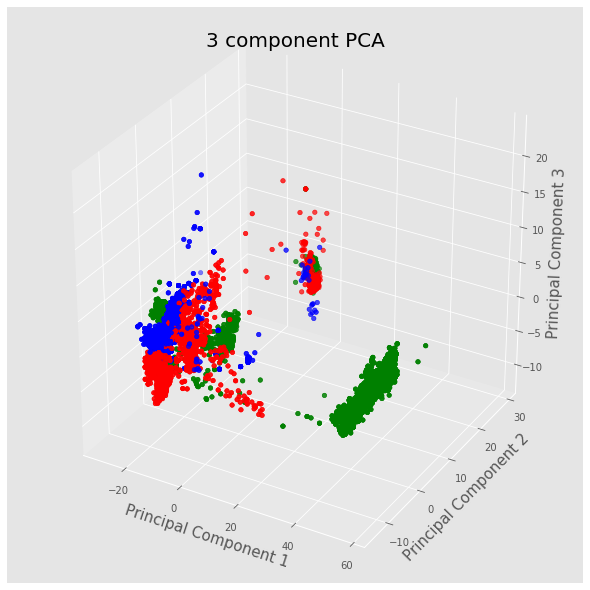

In [156]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)

LABEL_COLOR_MAP = {0 : 'r',1 : 'b', 2 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['label']]

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'],
           c=label_color)


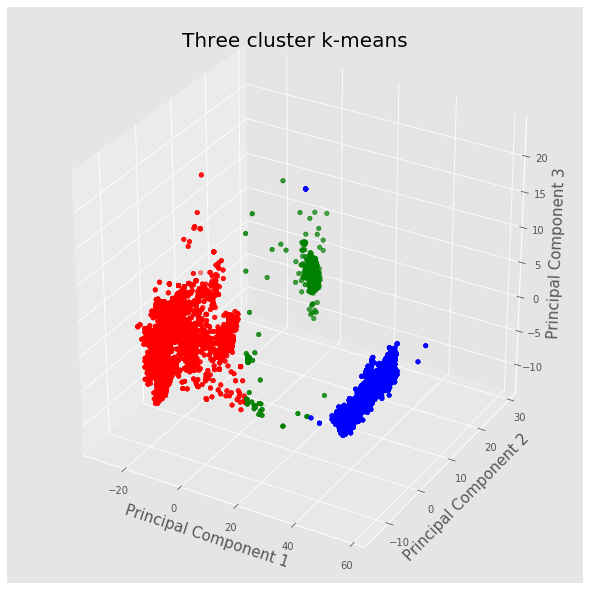

In [157]:
kmean = KMeans(n_clusters=3).fit(X)
cl = kmean.cluster_centers_

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three cluster k-means', fontsize = 20)


LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}


label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3']
             , c=label_color  )
# ax.scatter(cl[0][0], cl[0][1], s=80, marker=">", color = 'black')
# ax.scatter(cl[1][0], cl[1][1], s=80, marker=">", color = 'black')

## PCA and K means with all sensors ##

In [158]:
features = [ "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z"]
X = df[features]

In [159]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                          'principal component 4', 'principal component 5', 'principal component 6',
                         'principal component 7', 'principal component 8', 'principal component 9'
                         ])

principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-0.243989,23.824745,1.133619,0.548335,0.034446,-0.004251,-0.005201,-0.003486,-0.002274
1,-0.243989,23.824746,1.133620,0.548323,0.034448,-0.004246,-0.004217,-0.001712,-0.002473
2,-0.289227,24.104228,0.651785,0.475869,-0.026101,0.031185,-0.003985,-0.002359,-0.003077
3,-0.288779,24.103589,0.652544,0.470404,-0.024050,0.039454,-0.004155,-0.002340,-0.003211
4,-0.288779,24.103589,0.652545,0.470405,-0.024047,0.039464,-0.003658,-0.002572,-0.003233
...,...,...,...,...,...,...,...,...,...
40128,-21.113756,-2.905893,0.006428,-1.086888,-0.637297,0.689320,-0.051090,-0.132541,0.003435
40129,-21.112109,-2.788581,-0.063996,-0.533973,-0.409932,0.327680,-0.045071,-0.130788,0.010248
40130,-20.621736,-0.946732,-0.702214,-0.817813,-0.755668,0.400303,-0.044218,-0.133624,0.008356
40131,-20.621732,-0.946750,-0.702025,-0.817030,-0.754814,0.402224,0.076115,-0.239651,-0.058534


[9.27904731e-01 6.54882476e-02 6.02747659e-03 3.24752556e-04
 1.27421023e-04 9.49376677e-05 1.44604592e-05 9.93153491e-06
 8.04146099e-06]


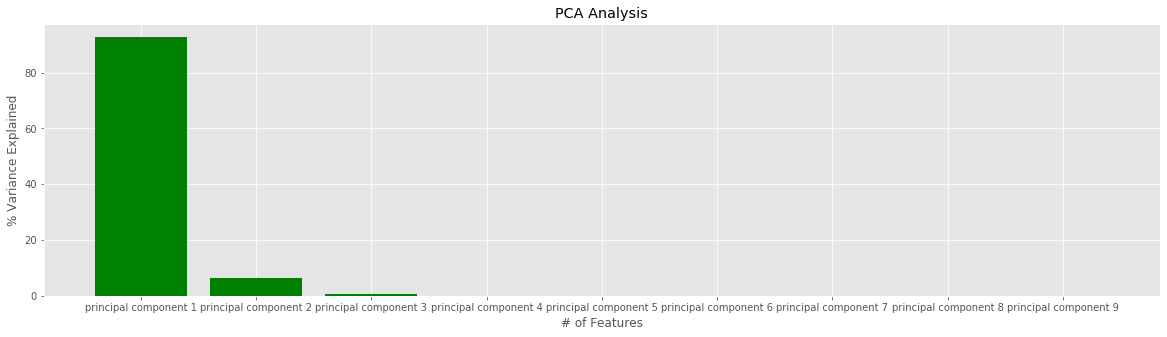

In [160]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
print(variance)

var=np.round(variance, decimals=3)*100


plt.figure(figsize = (20,5))

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(principalDf.columns)]

plt.bar(x_pos, var, color='green')
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.xticks(x_pos, principalDf.columns)

plt.show()

In [161]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,label
0,-0.243989,23.824745,1.133619,0.548335,0.034446,-0.004251,-0.005201,-0.003486,-0.002274,2
1,-0.243989,23.824746,1.133620,0.548323,0.034448,-0.004246,-0.004217,-0.001712,-0.002473,2
2,-0.289227,24.104228,0.651785,0.475869,-0.026101,0.031185,-0.003985,-0.002359,-0.003077,2
3,-0.288779,24.103589,0.652544,0.470404,-0.024050,0.039454,-0.004155,-0.002340,-0.003211,2
4,-0.288779,24.103589,0.652545,0.470405,-0.024047,0.039464,-0.003658,-0.002572,-0.003233,2
...,...,...,...,...,...,...,...,...,...,...
40128,-21.113756,-2.905893,0.006428,-1.086888,-0.637297,0.689320,-0.051090,-0.132541,0.003435,1
40129,-21.112109,-2.788581,-0.063996,-0.533973,-0.409932,0.327680,-0.045071,-0.130788,0.010248,1
40130,-20.621736,-0.946732,-0.702214,-0.817813,-0.755668,0.400303,-0.044218,-0.133624,0.008356,1
40131,-20.621732,-0.946750,-0.702025,-0.817030,-0.754814,0.402224,0.076115,-0.239651,-0.058534,1


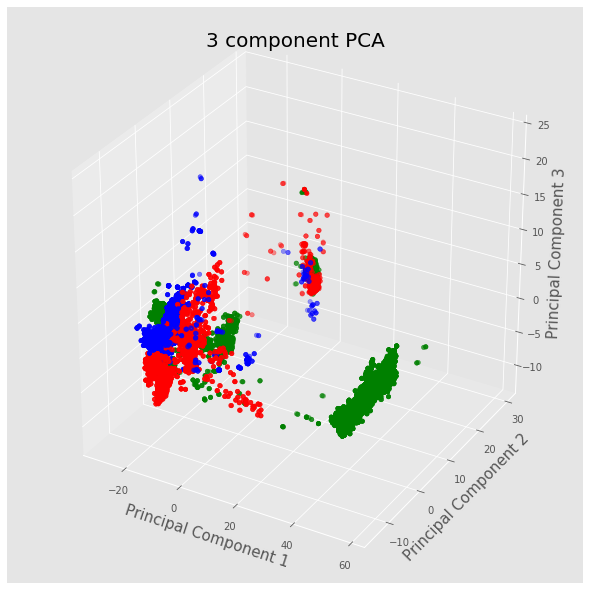

In [162]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)

LABEL_COLOR_MAP = {0 : 'r',1 : 'b', 2 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['label']]

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'],
           c=label_color)

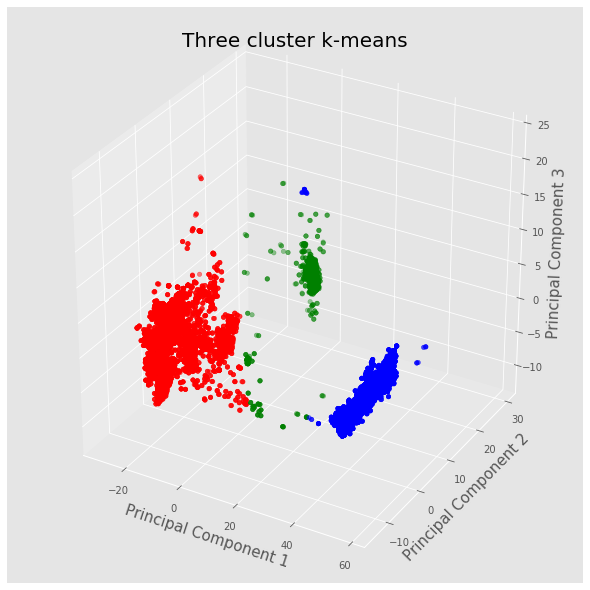

In [163]:
kmean = KMeans(n_clusters=3).fit(X)
cl = kmean.cluster_centers_

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three cluster k-means', fontsize = 20)


LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}


label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3']
             , c=label_color  )


## Random Forrest magnetometer only using cross validation ##

In [164]:
from sklearn.model_selection import cross_val_score

k_fold_summary = []

features = [ "magneto_x", "magneto_y", "magneto_z"]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    scores = cross_val_score(model, X=X, y=y, cv=5, n_jobs=4)
    k_fold_summary.append((i,scores.mean()))
    print("Model score for no of trees",i," is : ",scores.mean())

SyntaxError: invalid syntax (<ipython-input-164-c12ed5ae51b6>, line 19)